## Observations and Insights 

The is a strong positive relationship between mouse weight and tumor volume.

There is a fairly equal distribution of male and female mice.

Plotting tumor volume vs. timepoint for Capomulin reflects a lack of efficacy in its ability to reduce tumor size.

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:\\Users\\Gamer\\Downloads\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Gamer\\Downloads\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_mergeDF = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_mergeDF.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [157]:
# Checking the number of mice.
uniqueMice = mouse_mergeDF['Mouse ID'].nunique()

duplicateFreeDF = mouse_mergeDF.drop_duplicates()
duplicateFreeDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [158]:
# Checking the number of mice in the clean DataFrame.
duplicateFreeUniqueMice = duplicateFreeDF['Mouse ID'].nunique()

duplicateFreeUniqueMice

249

## Summary Statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_dict = {'mean': duplicateFreeDF.groupby(by=['Drug Regimen']).mean()['Tumor Volume (mm3)'],
               'median': duplicateFreeDF.groupby(by=['Drug Regimen']).median()['Tumor Volume (mm3)'],
               'variance': duplicateFreeDF.groupby(by=['Drug Regimen']).var()['Tumor Volume (mm3)'],
                'standard deviation': duplicateFreeDF.groupby(by=['Drug Regimen']).std()['Tumor Volume (mm3)'], 
                'standard error of mean': duplicateFreeDF.groupby(by=['Drug Regimen']).sem()['Tumor Volume (mm3)']                                                                 
               }

summary_df = pd.DataFrame(data = summary_dict)
summary_df

,mean,median,variance,standard deviation,standard error of mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggDF = duplicateFreeDF.groupby(by=['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

summary_aggDF

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

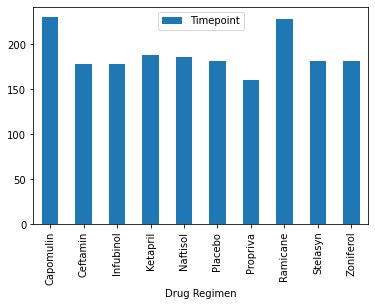

In [181]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

totalDrugTimepoints = duplicateFreeDF.groupby(by=['Drug Regimen'], as_index=False).count()
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drugticks = [0,1,2,3,4,5,6,7,8,9]
totalDrugTimepoints.plot.bar(y = 'Timepoint')
plt.xticks(ticks=drugticks,labels=drugs)
plt.xlabel("Drug Regimen")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

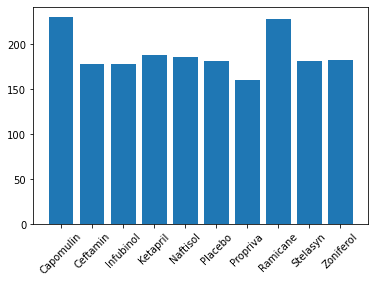

In [162]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = totalDrugTimepoints['Drug Regimen']

plt.bar(totalDrugTimepoints['Drug Regimen'], totalDrugTimepoints['Timepoint'],)
plt.xticks(rotation = 45)

<AxesSubplot:ylabel='Mouse ID'>

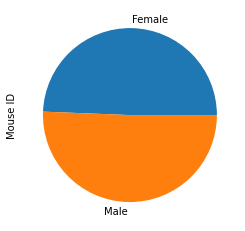

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderGroup = duplicateFreeDF.groupby(by = ['Sex']).count()['Mouse ID']
genderGroup.head()

genderGroup.plot.pie(y='Sex')


([<matplotlib.patches.Wedge at 0x190d1754130>,
 [Text(0.021916657774508554, 1.099781642014448, 'Female'),
  Text(-0.021916760743497157, -1.0997816399624576, 'Male')])

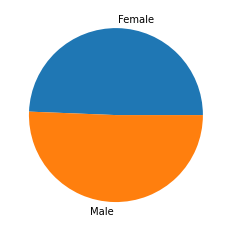

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plt.pie(genderGroup, labels=labels)


## Quartiles, Outliers and Boxplots

In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalVolumeDF = duplicateFreeDF[duplicateFreeDF['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

finalVolumeSlim = finalVolumeDF[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
finalVolumeSlim = finalVolumeSlim.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
finalVolumeSlim = pd.DataFrame(finalVolumeSlim)

finalVolumeSlim

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [166]:
# Put treatments into a list for for loop (and later for plot labels)
topDrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
duplicateFreeDF.head(20)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [167]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finalDF = finalVolumeSlim.reset_index()

finalDF.head()
#capomulinDF = finalDF.loc[finalDF['Drug Regimen']=='Capomulin',:]
#ramicaneDF = finalDF.loc[finalDF['Drug Regimen']=='Ramicane',:]
#infubinolDF = finalDF.loc[finalDF['Drug Regimen']=='Infubinol',:]
#ceftaminDF = finalDF.loc[finalDF['Drug Regimen']=='Ceftamin',:]




,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint (Capomulin)')

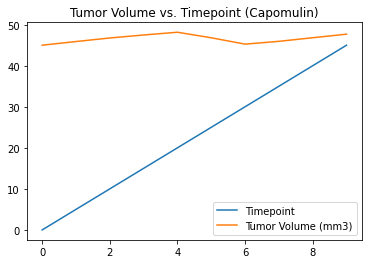

In [186]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capLine = duplicateFreeDF.loc[duplicateFreeDF['Drug Regimen']=='Capomulin',]
capLine = capDF.groupby('Timepoint').max()['Tumor Volume (mm3)']
capLine = pd.DataFrame(capLine)
capLine = capLine.reset_index()
capLine.plot.line()
plt.title("Tumor Volume vs. Timepoint (Capomulin)")

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight')

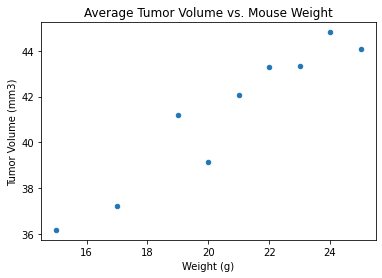

In [185]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capScatter = duplicateFreeDF.loc[duplicateFreeDF['Drug Regimen']=='Capomulin',]
capScatter = capScatter.groupby('Weight (g)').mean()['Tumor Volume (mm3)']
capScatter = pd.DataFrame(capScatter)
capScatter = capScatter.reset_index()
capScatter.head()
capScatter.plot(kind = 'scatter',x='Weight (g)', y='Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight")

## Correlation and Regression

Text(0.5, 1.0, 'Mouse Weight Vs. Average Tumor Volume')

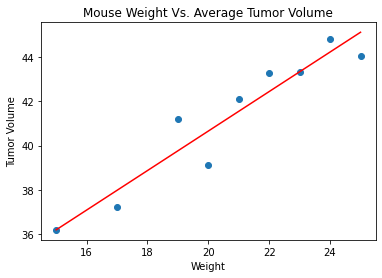

In [184]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capScatter['Weight (g)']
y_values = capScatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Mouse Weight Vs. Average Tumor Volume")